In [7]:
import pickle
import pandas as pd

In [2]:
tmp = pickle.load(open("0306-currency adjusted rebalance record.out", "rb"))
nominal_price_result = tmp[0]
actual_price_result = tmp[1]

In [54]:
df_list = pickle.load(open("0306-adjusted market prices.out", "rb"))

In [6]:
nominal

[{'Date': Timestamp('2015-01-05 00:00:00'),
  'Record': [{'Asset': '^BVSP',
    'Number': 2.1045099648546834,
    'Price': 47517.0,
    'Net Value': 100000.0,
    'Delta Number': 2.1045099648546834},
   {'Asset': '^TWII',
    'Number': 10.782745164625332,
    'Price': 9274.076172,
    'Net Value': 100000.0,
    'Delta Number': 10.782745164625332},
   {'Asset': '^IXIC',
    'Number': 21.49349795550752,
    'Price': 4652.569824,
    'Net Value': 100000.0,
    'Delta Number': 21.49349795550752}]},
 {'Date': Timestamp('2015-02-02 00:00:00'),
  'Record': [{'Asset': '^BVSP',
    'Number': 2.112685006679409,
    'Price': 47651.0,
    'Net Value': 100671.55325328052,
    'Delta Number': 0.008175041824725504},
   {'Asset': '^TWII',
    'Number': 10.724725646373493,
    'Price': 9386.956055,
    'Net Value': 100672.52834443946,
    'Delta Number': -0.058019518251839486},
   {'Asset': '^IXIC',
    'Number': 21.52636690454513,
    'Price': 4676.689941,
    'Net Value': 100672.14356876152,
    'Del

In [39]:
nominal = nominal_price_result[3]
date_df = pd.DataFrame([tmp['Date']for tmp in nominal], columns = ['Date'])
nominal_df_list = []
for i in range(3):
    asset_df = pd.DataFrame([tmp['Record'][i] for tmp in nominal])
    result_df = pd.concat([date_df, asset_df], axis=1)
    result_df.rename(columns={'0':'Date'}, inplace=True)
    nominal_df_list.append(result_df)

In [40]:
actual = actual_price_result[3]
date_df = pd.DataFrame([tmp['Date']for tmp in actual], columns = ['Date'])
actual_df_list = []
for i in range(3):
    asset_df = pd.DataFrame([tmp['Record'][i] for tmp in actual])
    result_df = pd.concat([date_df, asset_df], axis=1)
    result_df.rename(columns={'0':'Date'}, inplace=True)
    actual_df_list.append(result_df)

In [60]:
nominal_df_list[2]

,Date,Asset,Number,Price,Net Value,Delta Number
0,2015-01-05,^IXIC,21.493498,4652.569824,100000.000000,21.493498
1,2015-02-02,^IXIC,21.526367,4676.689941,100672.143569,0.032869
2,2015-03-02,^IXIC,21.203588,5008.100098,106189.690007,-0.322779
3,2015-03-31,^IXIC,21.518549,4900.879883,105459.825549,0.314962
4,2015-04-30,^IXIC,22.279257,4941.419922,110091.165609,0.760708
5,2015-06-01,^IXIC,21.313097,5082.930176,108332.986347,-0.966160
6,2015-06-30,^IXIC,21.364981,4986.870117,106544.386347,0.051884
7,2015-07-31,^IXIC,20.194416,5128.279785,103562.613636,-1.170566
8,2015-08-31,^IXIC,20.173593,4776.509766,96359.363737,-0.020823
9,2015-09-30,^IXIC,20.399634,4620.160156,94249.576690,0.226041


In [104]:
actual_df_list[1]

,Date,Asset,Number,Price,Net Value,Delta Number
0,2015-01-05,^TWII,10.781398,9275.235069,100000.000000,10.781398
1,2015-02-02,^TWII,10.898882,9180.213758,100054.070058,0.117484
2,2015-03-02,^TWII,11.058061,9297.918846,102816.957314,0.159179
3,2015-03-31,^TWII,10.683202,9244.400797,98759.805120,-0.374859
4,2015-04-30,^TWII,11.278061,9281.159290,104673.481973,0.594859
5,2015-06-01,^TWII,11.165910,9072.354487,101301.090550,-0.112151
6,2015-06-30,^TWII,11.490559,8776.950293,100852.069023,0.324650
7,2015-07-31,^TWII,11.439164,8339.281829,95394.413733,-0.051395
8,2015-08-31,^TWII,10.916765,8047.990251,87858.018581,-0.522399
9,2015-09-30,^TWII,10.305939,8216.197863,84675.633662,-0.610826


In [56]:
df_list[1]

,Date,Open,High,Low,Price,Vol,Change,FX Change,Cum FX Change,Actual Price
0,2015-01-05,9292.309570,9292.309570,9182.019531,9274.076172,2311000.0,-0.003562,0.000125,1.000125,9275.235069
1,2015-01-06,9209.929688,9209.929688,9043.440430,9048.306641,2725800.0,-0.024344,-0.000593,0.999531,9044.066572
2,2015-01-07,9051.940430,9108.660156,9050.540039,9080.055664,2384100.0,0.003509,-0.000469,0.999063,9071.545771
3,2015-01-08,9154.030273,9246.620117,9154.030273,9237.996094,2657600.0,0.017394,-0.002251,0.996813,9208.559180
4,2015-01-09,9247.400391,9284.570313,9215.580078,9215.545898,2398800.0,-0.002430,-0.000721,0.996095,9179.558918
...,...,...,...,...,...,...,...,...,...,...
1132,2019-12-20,12001.559570,12028.219727,11937.450195,11959.080078,2649800.0,-0.004977,0.000996,0.908132,10860.422137
1133,2019-12-23,11969.139648,12022.230469,11960.209961,12022.230469,1907900.0,0.005281,0.000033,0.908162,10918.133065
1134,2019-12-26,12018.379883,12030.660156,11982.639648,12001.009766,1618300.0,-0.000593,-0.000166,0.908011,10897.050967
1135,2019-12-27,12032.719727,12093.019531,12032.719727,12091.589844,1868500.0,0.007548,-0.000033,0.907981,10978.933905


In [98]:
tmp_trans_df = actual_df_list[1]
trans_date = tmp_trans_df['Date']
start_date = list(trans_date)[0]
end_date = list(trans_date)[-1]

history_df = df_list[1]
all_price_date = history_df['Date'][(history_df['Date']>=start_date) & (history_df['Date']<= end_date)]
plot_data = []
number = 0
net_value = 0
price = 0
for date in all_price_date:
    if (trans_date == date).any(): # If rebalanced at that day:
        number = tmp_trans_df['Number'][tmp_trans_df['Date']==date].values[0]
        net_value = tmp_trans_df['Net Value'][tmp_trans_df['Date']==date].values[0]
        price = tmp_trans_df['Price'][tmp_trans_df['Date']==date].values[0]
    else:
        price = history_df['Actual Price'][history_df['Date']==date].values[0]
        net_value = number*price
    plot_data.append({
        "Date": date,
        "Number": number,
        "Price": price,
        "Net Value": net_value
    })

In [99]:
plot_data = pd.DataFrame(plot_data)
plot_data

,Date,Number,Price,Net Value
0,2015-01-05,10.781398,9275.235069,100000.000000
1,2015-01-06,10.781398,9044.066572,97507.680448
2,2015-01-07,10.781398,9071.545771,97803.944626
3,2015-01-08,10.781398,9208.559180,99281.140711
4,2015-01-09,10.781398,9179.558918,98968.477339
...,...,...,...,...
1114,2019-11-25,16.086432,10636.976550,171110.996945
1115,2019-11-26,16.086432,10650.997992,171336.551911
1116,2019-11-27,16.086432,10708.963866,172269.015991
1117,2019-11-29,16.086432,10554.108139,169777.939916


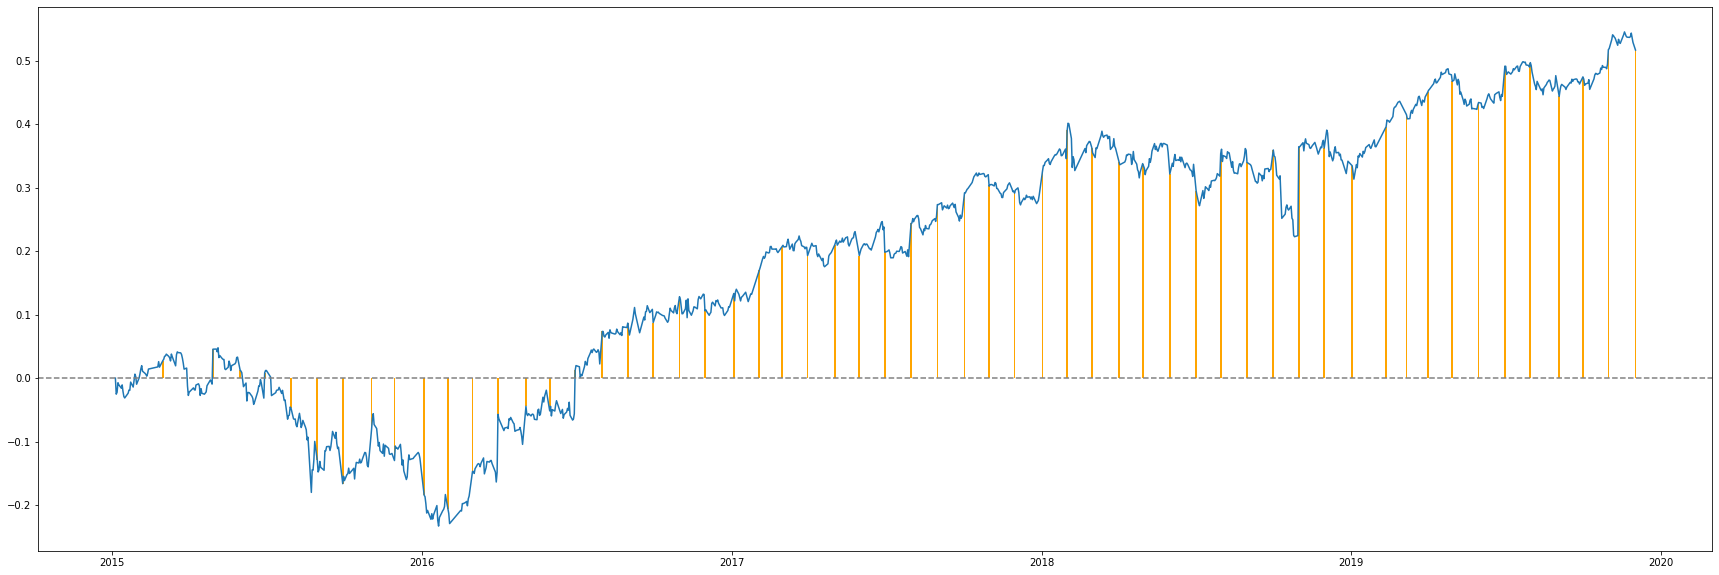

In [118]:
plt.figure(figsize=(30,10))
plt.plot(plot_data['Date'], np.log(plot_data['Net Value']/plot_data['Net Value'][0]))
plt.bar(actual_df_list[1]['Date'], np.log(actual_df_list[1]['Net Value']/actual_df_list[1]['Net Value'][0]),width=2,color="orange")
plt.axhline(y=0, color = "grey", linestyle='--')

In [89]:
tmp_trans_df['Number'][tmp_trans_df['Date']==all_price_date[0]].values[0]

10.781397910903255

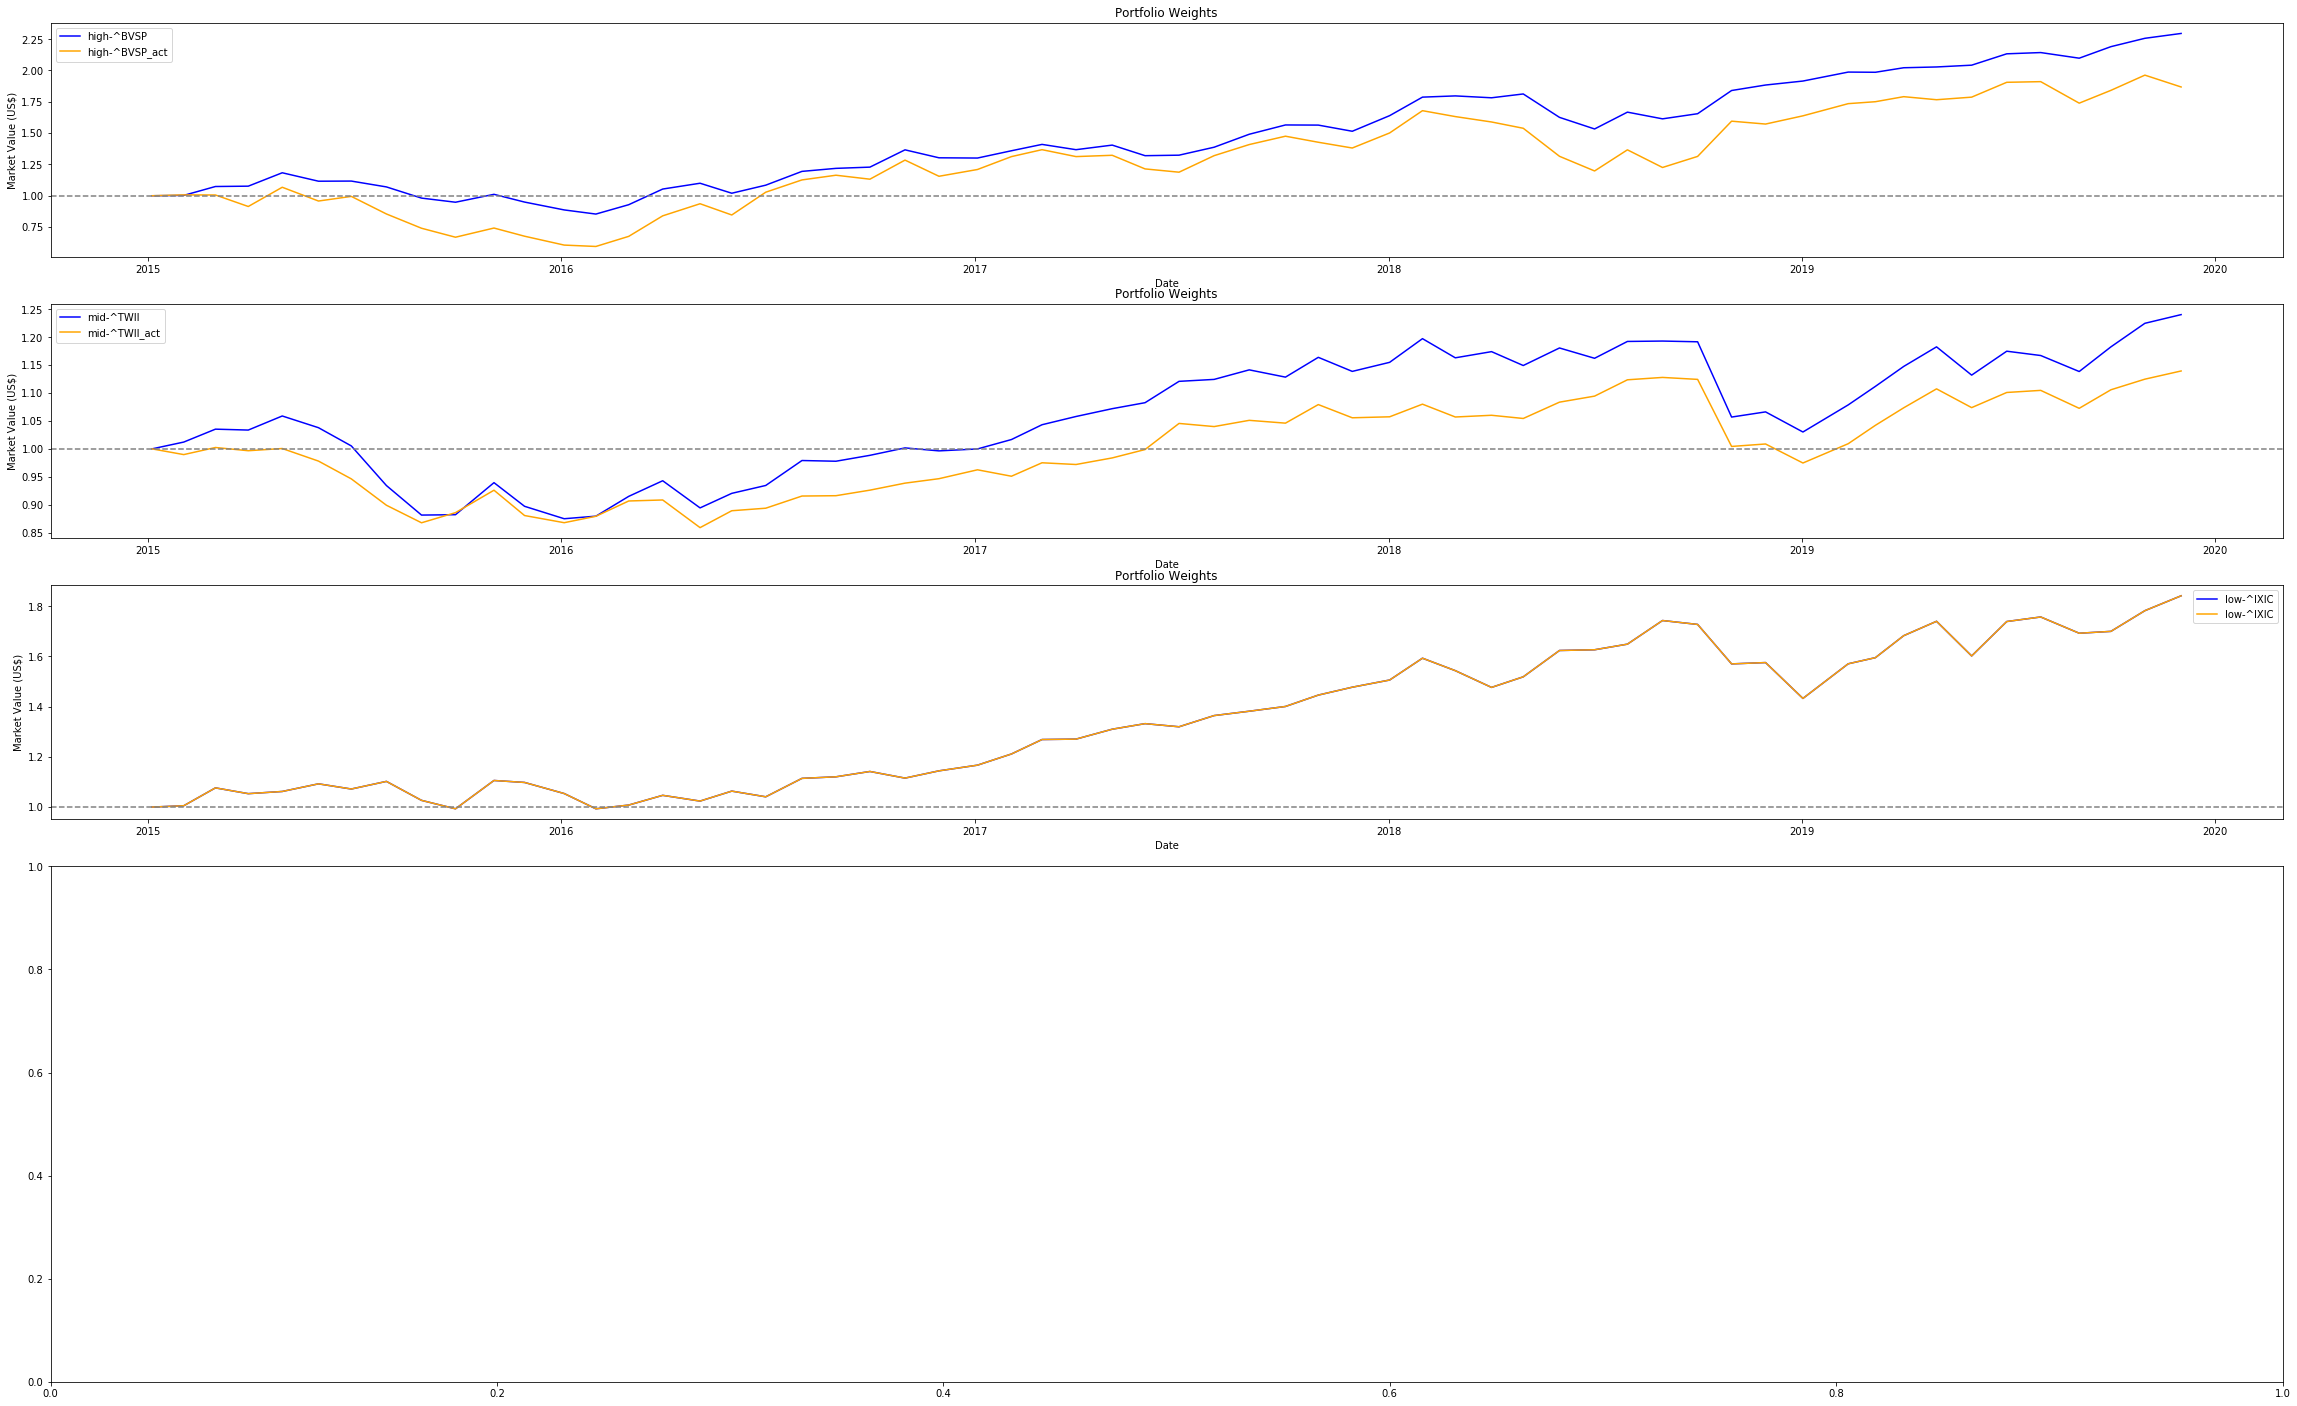

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


nominal_labels = ["high-^BVSP", "mid-^TWII", "low-^IXIC"]
actual_labels = ["high-^BVSP_act", "mid-^TWII_act", "low-^IXIC"]

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
fig=plt.figure(figsize=(40,25))
axs = []
gs=GridSpec(5,1) # 5 rows, 1 columns
axs.append(fig.add_subplot(gs[0,0])) # First row, first column
axs.append(fig.add_subplot(gs[1,0])) # First row, second column
axs.append(fig.add_subplot(gs[2,0])) # First row, third column
axs.append(fig.add_subplot(gs[3:,:])) # Second row, span all columns


for i in range(3):
    axs[i].plot(nominal_df_list[i]['Date'], nominal_df_list[i]['Price']/nominal_df_list[i]['Price'][0], color = "blue", label = nominal_labels[i])
    axs[i].plot(actual_df_list[i]['Date'], actual_df_list[i]['Price']/actual_df_list[i]['Price'][0], color = "orange", label = actual_labels[i])
    axs[i].axhline(y=1, color = "grey", linestyle='--')
#     axs[i].set_ylim((0, 300000))
    axs[i].legend()
    axs[i].set_title('Portfolio Weights')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Value (US$)')